In [2]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
#this analysis takes only Ursus, Włochy and Bemowo into account

In [3]:
flats_data_dir = r"C:\Users\piotr\OneDrive\Pulpit\projekty\flats_analysis\scrapped_data\flats_data_timestamp_was_here.csv"
print(flats_data_dir)
flats_df = pd.read_csv(flats_data_dir)
flats_df = flats_df.drop_duplicates()
flats_df = flats_df.drop("Unnamed: 0", axis=1)
flats_df = flats_df[flats_df["District"] != flats_df["Street"]]
flats_df

C:\Users\piotr\OneDrive\Pulpit\projekty\flats_analysis\scrapped_data\flats_data_timestamp_was_here.csv


,link,City,District,Street,Meters,Floor,Rooms,Price
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000
1,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ko...,Warszawa,Okęcie,Komitetu Obrony Robotników,56.0,3/4,3,750000
2,/oferta/sprzedaz-mieszkanie-warszawa-ursus-ryz...,Warszawa,Skorosze,Ryżowa,78.0,5/7,3,1049000
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999
...,...,...,...,...,...,...,...,...
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066
2993,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066


In [4]:
flats_df = flats_df[flats_df["Floor"].str.contains("/", na=False)]
flats_df[["Level", "Levels_in_bldg"]] = flats_df["Floor"].str.split("/", expand=True)
flats_df

C:\Users\piotr\AppData\Local\Temp\ipykernel_17448\3464283094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_df[["Level", "Levels_in_bldg"]] = flats_df["Floor"].str.split("/", expand=True)
C:\Users\piotr\AppData\Local\Temp\ipykernel_17448\3464283094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_df[["Level", "Levels_in_bldg"]] = flats_df["Floor"].str.split("/", expand=True)


,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4
1,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ko...,Warszawa,Okęcie,Komitetu Obrony Robotników,56.0,3/4,3,750000,3,4
2,/oferta/sprzedaz-mieszkanie-warszawa-ursus-ryz...,Warszawa,Skorosze,Ryżowa,78.0,5/7,3,1049000,5,7
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7
...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6


In [5]:
def create_geocoding_input(row):
    return f"{row['City']}, {row['District']}, {row['Street']}"
flats_df["geocoding_input"] = flats_df.apply(create_geocoding_input, axis=1)
flats_df

C:\Users\piotr\AppData\Local\Temp\ipykernel_17448\2304813771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_df["geocoding_input"] = flats_df.apply(create_geocoding_input, axis=1)


,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,geocoding_input
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,"Warszawa, Włochy, Łopuszańska"
1,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ko...,Warszawa,Okęcie,Komitetu Obrony Robotników,56.0,3/4,3,750000,3,4,"Warszawa, Okęcie, Komitetu Obrony Robotników"
2,/oferta/sprzedaz-mieszkanie-warszawa-ursus-ryz...,Warszawa,Skorosze,Ryżowa,78.0,5/7,3,1049000,5,7,"Warszawa, Skorosze, Ryżowa"
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,"Warszawa, Bemowo, Powstańców Śląskich"
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,"Warszawa, Ursus, Edwarda Habicha"
...,...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,"Warszawa, Włochy, Równoległa"
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa"
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa"
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,"Warszawa, Włochy, Równoległa"


In [7]:
streets_df = pd.read_csv(r"C:\Users\piotr\OneDrive\Pulpit\projekty\flats_analysis\scrapped_data\streets_coordinates.csv", sep=";")
streets_dict = streets_df.set_index("input_string").to_dict(orient="index")

In [8]:
def add_geocoding_columns(row):
    geocoding_data = streets_dict.get(row["geocoding_input"], {})
    return pd.Series({
        "bounds_ne_lat": geocoding_data.get("bounds_ne_lat", None),
        "bounds_ne_lng": geocoding_data.get("bounds_ne_lng", None),
        "bounds_sw_lat": geocoding_data.get("bounds_sw_lat", None),
        "bounds_sw_lng": geocoding_data.get("bounds_sw_lng", None),
        "center_lat": geocoding_data.get("center_lat", None),
        "center_lng": geocoding_data.get("center_lng", None)
    })
flats_df = flats_df.join(flats_df.apply(add_geocoding_columns, axis=1))
flats_df                             

,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,geocoding_input,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,"Warszawa, Włochy, Łopuszańska",52.197915,20.958876,52.189157,20.923734,52.193579,20.941161
1,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ko...,Warszawa,Okęcie,Komitetu Obrony Robotników,56.0,3/4,3,750000,3,4,"Warszawa, Okęcie, Komitetu Obrony Robotników",52.187088,20.984470,52.177444,20.953148,52.183004,20.970108
2,/oferta/sprzedaz-mieszkanie-warszawa-ursus-ryz...,Warszawa,Skorosze,Ryżowa,78.0,5/7,3,1049000,5,7,"Warszawa, Skorosze, Ryżowa",52.199806,20.914189,52.181887,20.903716,52.192209,20.908197
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,"Warszawa, Bemowo, Powstańców Śląskich",52.269365,20.933587,52.219092,20.906788,52.243817,20.912364
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,"Warszawa, Ursus, Edwarda Habicha",52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525


In [10]:
flats_df["price_per_meter"] = flats_df["Price"]/flats_df["Meters"]
flats_df = flats_df.dropna()
flats_df

C:\Users\piotr\AppData\Local\Temp\ipykernel_17448\3464333493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_df["price_per_meter"] = flats_df["Price"]/flats_df["Meters"]


,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,geocoding_input,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng,price_per_meter
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,"Warszawa, Włochy, Łopuszańska",52.197915,20.958876,52.189157,20.923734,52.193579,20.941161,14865.671642
1,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ko...,Warszawa,Okęcie,Komitetu Obrony Robotników,56.0,3/4,3,750000,3,4,"Warszawa, Okęcie, Komitetu Obrony Robotników",52.187088,20.984470,52.177444,20.953148,52.183004,20.970108,13392.857143
2,/oferta/sprzedaz-mieszkanie-warszawa-ursus-ryz...,Warszawa,Skorosze,Ryżowa,78.0,5/7,3,1049000,5,7,"Warszawa, Skorosze, Ryżowa",52.199806,20.914189,52.181887,20.903716,52.192209,20.908197,13448.717949
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,"Warszawa, Bemowo, Powstańców Śląskich",52.269365,20.933587,52.219092,20.906788,52.243817,20.912364,16619.718310
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,"Warszawa, Ursus, Edwarda Habicha",52.207000,20.882900,52.202049,20.878161,52.204589,20.880754,16630.413043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525,16361.577778
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525,16020.000000
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525,16020.000000
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525,14076.757576


Text(0.5, 1.0, 'Centers of streets taken into account')

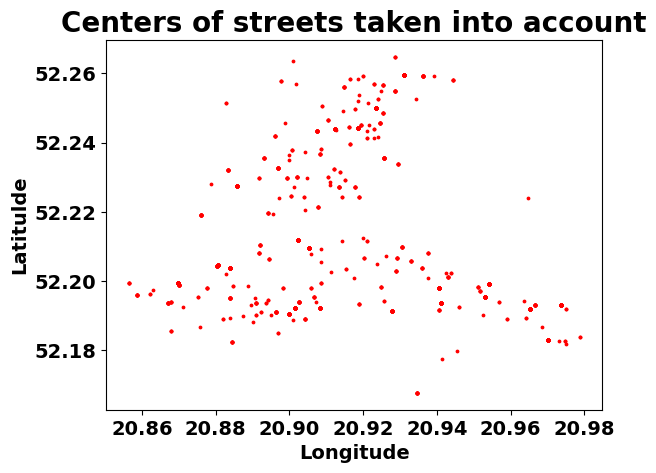

In [11]:
#I am plotting the centers of streets to see if it looks like data I am expecting
plt.scatter(flats_df["center_lng"], flats_df["center_lat"], s=3,c="r")
plt.xlabel("Longitude", fontsize=14, weight="bold")
plt.ylabel("Latitulde", fontsize=14, weight="bold")
plt.xticks(fontsize=14, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.title("Centers of streets taken into account", fontsize=20, weight="bold")



In [12]:
#map above looks fine - the white area  in the middle of the graph is the Warsaw Cross-City Railroad Line
X = flats_df[["Meters","Rooms","Level","Levels_in_bldg","bounds_ne_lat","bounds_ne_lng","bounds_sw_lat","bounds_sw_lng","center_lat","center_lng"]]
X

,Meters,Rooms,Level,Levels_in_bldg,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
0,67.0,3,3,4,52.197915,20.958876,52.189157,20.923734,52.193579,20.941161
1,56.0,3,3,4,52.187088,20.984470,52.177444,20.953148,52.183004,20.970108
2,78.0,3,5,7,52.199806,20.914189,52.181887,20.903716,52.192209,20.908197
4,71.0,3,10,11,52.269365,20.933587,52.219092,20.906788,52.243817,20.912364
5,46.0,2,0,7,52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
...,...,...,...,...,...,...,...,...,...,...
2989,45.0,2,1,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2990,53.0,3,5,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2991,53.0,3,5,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2992,66.0,3,1,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525


In [13]:
y = flats_df["price_per_meter"]
y

0       14865.671642
1       13392.857143
2       13448.717949
4       16619.718310
5       16630.413043
            ...     
2989    16361.577778
2990    16020.000000
2991    16020.000000
2992    14076.757576
2993    14076.757576
Name: price_per_meter, Length: 1740, dtype: float64

In [14]:


from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,Meters,Rooms,Level,Levels_in_bldg,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
151,61.0,3,2,4,52.236737,20.904059,52.235907,20.896093,52.236368,20.900012
1938,53.0,3,5,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2926,58.0,3,0,2,52.212287,20.907409,52.207569,20.904065,52.209643,20.905230
1017,78.0,3,3,4,52.254066,20.899236,52.248797,20.866895,52.251591,20.882801
2289,53.0,3,5,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
...,...,...,...,...,...,...,...,...,...,...
666,60.0,3,2,7,52.196971,20.953683,52.194500,20.952490,52.195410,20.953051
461,49.0,2,2,7,52.197114,20.861501,52.194906,20.856986,52.195914,20.858712
525,55.0,3,1,5,52.246268,20.921221,52.244576,20.918670,52.245143,20.919506
598,48.0,2,0,5,52.262981,20.933082,52.256353,20.927821,52.259640,20.930992


In [15]:
#I chose RandomForest because it can model non-monotonic relationships between latitude and longitude

forest = RandomForestRegressor()
parameters = {"n_estimators": [4,8,12,16,20], "max_depth": [12, 14, 16, 18, 20, 22, 24], "min_samples_leaf": [1,2,3]}
clf = GridSearchCV(forest, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 14, 16, 18, 20, 22, 24],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [4, 8, 12, 16, 20]})

In [16]:
best_forest = clf.best_estimator_
best_forest.score(X_train, y_train)

0.939763565424507

In [17]:
best_forest.score(X_test, y_test)

0.6193459114938998

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

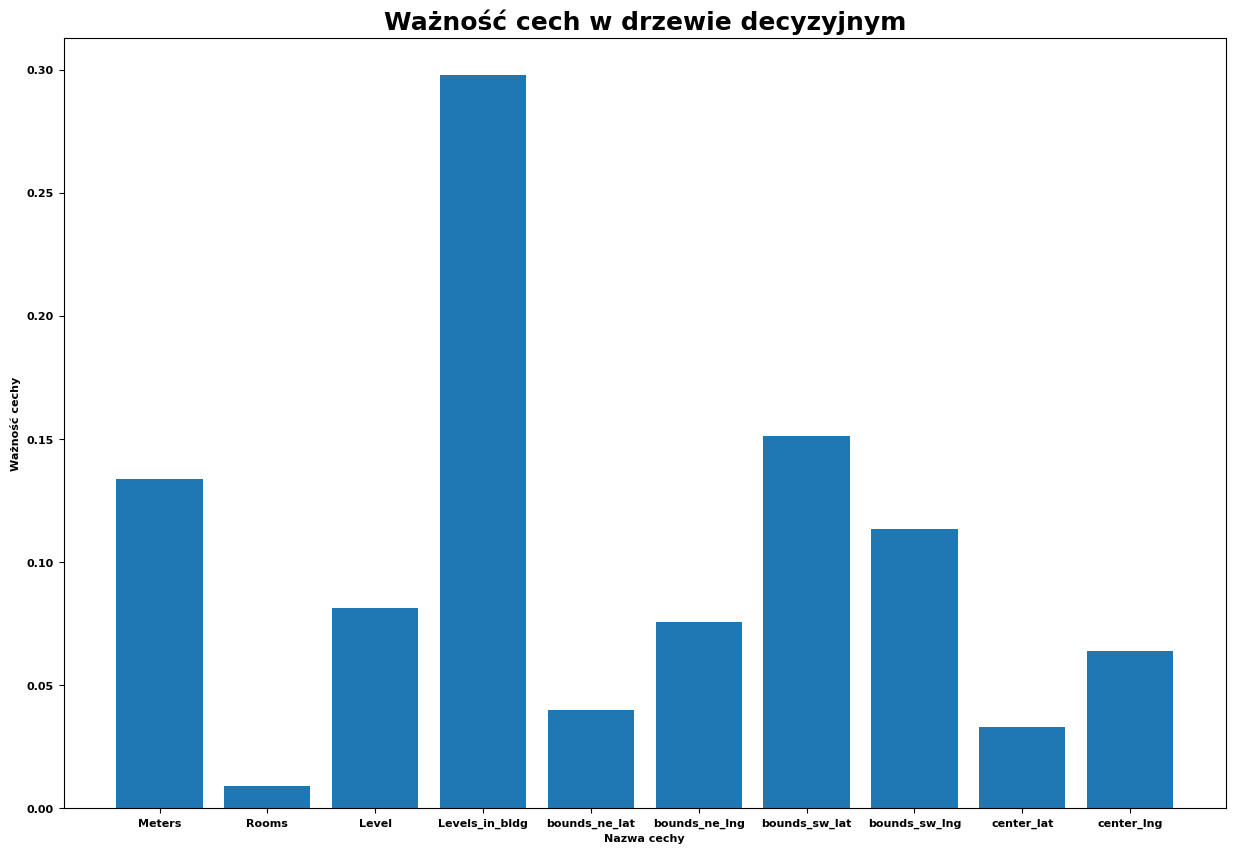

In [18]:
plt.figure(figsize=(15,10))
plt.bar(best_forest.feature_names_in_, best_forest.feature_importances_)

plt.xlabel("Nazwa cechy", fontsize=8, weight="bold")
plt.ylabel("Ważność cechy", weight="bold", fontsize=8)
plt.title("Ważność cech w drzewie decyzyjnym", weight="bold", fontsize=18)
plt.xticks(fontsize=8, weight="bold")
plt.yticks(fontsize=8, weight="bold")

In [ ]:

"""As we can see, latitude is more important in 2 out of 3 features. For a person living in Warsaw, it is pretty intuitive that west - east direction 
is more important that north - south direction"""

In [20]:
#Model używający maszyny wektorów nośnych
from sklearn.svm import SVR
parameters = {'kernel':["linear", "poly", "rbf", "sigmoid" ]}
svr_model = SVR()
grid_search = GridSearchCV(svr_model, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
parameters = {'gamma':[0.01, 1, 100 ], "C": [0.001, 1, 1000]}
svr_model = SVR(kernel= "linear")
grid_search = GridSearchCV(svr_model, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.001, 1, 1000], 'gamma': [0.01, 1, 100]})

In [22]:
grid_search.best_estimator_.score(X_train, y_train)

0.038916019778868716

In [23]:
grid_search.best_estimator_.score(X_test, y_test)

0.012337429237136321

In [24]:
#As we can se, this model cannot be applied here 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_parameters = {"n_estimators": [100, 150, 200], "max_depth": [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]}
gradient_regresor = GradientBoostingRegressor()
gradient_grid_search = GridSearchCV(gradient_regresor, gradient_parameters)
gradient_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
                         'n_estimators': [100, 150, 200]})

In [28]:
gradient_grid_search.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [29]:
best_gradient = gradient_grid_search.best_estimator_
best_gradient.score(X_train, y_train)

0.8671402546374158

In [30]:
best_gradient.score(X_test, y_test)

0.6384948295685714

In [ ]:
#this model gives the best result of all models tested